# 1. EDA & Data Cleansing

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import StratifiedKFold

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("pima-indians-diabetes.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
header = ["n_pregnancies", "plasma glucose concentration", "diastolic blood pressure", "triceps skin thickness", "2-hour serum insulin", "bmi", "diabetes pedigree function", "age", "diabetes"]

In [5]:
df.columns = header

In [6]:
df.head()

,n_pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skin thickness,2-hour serum insulin,bmi,diabetes pedigree function,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This dataset consists of 768 rows/instances/observations/entities/data points/tuples/samples and 9 columns/attributes/features/variables. First 8 attributes are so called independent attributes while the last one (9th) is a dependent attribute.

In [7]:
df.describe()

,n_pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skin thickness,2-hour serum insulin,bmi,diabetes pedigree function,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Mean value of the last column (diabetes), which is also our target variable, is 0.35. This means that a 35% of our data points belong to a positive class. So, this dataset is unbalanced but not too much.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_pregnancies                 768 non-null    int64  
 1   plasma glucose concentration  768 non-null    int64  
 2   diastolic blood pressure      768 non-null    int64  
 3   triceps skin thickness        768 non-null    int64  
 4   2-hour serum insulin          768 non-null    int64  
 5   bmi                           768 non-null    float64
 6   diabetes pedigree function    768 non-null    float64
 7   age                           768 non-null    int64  
 8   diabetes                      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data types are okey and there are no None nor NaN values in our dataset. Unfortunately, that doesn't mean that we don't have any missing values. They can be encoded with other values like 0, -1, -999 or something like that. So it makes this process a little bit complicated. We also want to look if there are any potential outliers that don't make sense or some potential measurement errors. Just to mention, there could also be some regular/valid outliers. This is also a main reason for having some domain knowledge as a data scientist or at least to have an expert from an appropriate field beside you who can help you with detecting if something is out of place.

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(768, 9)

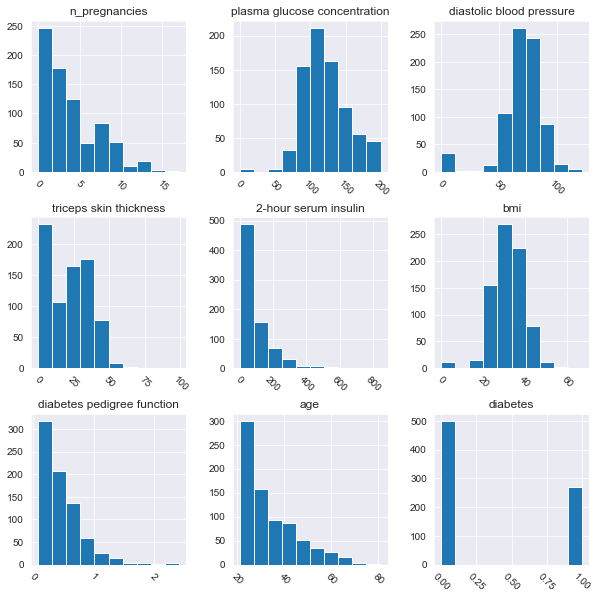

In [10]:
df.hist(figsize=(10,10), xrot=-45)
plt.show()

From these histograms we can detect some suspicious values. At the first sight values at the upper/higher boundary are valid/realistic but there are 0 values for some attributes that don't make sense. Attributes **n_pregnancies** and **diabetes** have some 0 values and that's normal at the first sight. Maybe there are some missing values encoded with value 0 in the attribute n_pregnancies but we can't know that. Overall, 0 pregnancies make sense so we will leave it as it is. Values in the **age** attribute also make sense. There are no zero values nor some huge, nonsense, ages. **Diabetes pedigree function** doesn't have 0 values and whole range of values are in appropriate range so we won't touch this one. For **BMI** to be 0 your body mass should be 0 which is not possible. Second option is that you are extremely (impossibly) tall and you have really small, tiny, body mass which is also not possible. Knowing that, we can conclude that 0 value for BMI is for sure not valid. It's either a missing value encoded with zero or some measurement error. **Diastolic blood pressure** can be 0 in some rare cases but we have 35 instances with that value and then there is some gap up to the value of cca 40 which is really suspicious. The distribution that we can see from the histogram above is very similar as one for BMI. **Plasma glucose concentration** attribute also has similar distribution as last two attributes with some zero values. Maybe is that a sign that in this, particular dataset, missing values are encoded with 0s. **Triceps skin thickness** can't be 0. Now, we'll do some additional inspections into the data to verify what we previously mentioned. 

In [11]:
for h in header:
    mask = df[h] == 0
    count = df[h][mask].count()
    print(f"Number of zero values in attribute {h}: {count}")

Number of zero values in attribute n_pregnancies: 111
Number of zero values in attribute plasma glucose concentration: 5
Number of zero values in attribute diastolic blood pressure: 35
Number of zero values in attribute triceps skin thickness: 227
Number of zero values in attribute 2-hour serum insulin: 374
Number of zero values in attribute bmi: 11
Number of zero values in attribute diabetes pedigree function: 0
Number of zero values in attribute age: 0
Number of zero values in attribute diabetes: 500


In [12]:
df["bmi"].sort_values().iloc[:15]

145     0.0
706     0.0
522     0.0
49      0.0
371     0.0
684     0.0
60      0.0
9       0.0
426     0.0
81      0.0
494     0.0
418    18.2
438    18.2
526    18.2
239    18.4
Name: bmi, dtype: float64

In [13]:
df["diastolic blood pressure"].sort_values().iloc[:40]

347     0
494     0
222     0
81      0
78      0
484     0
468     0
60      0
453     0
300     0
261     0
266     0
706     0
49      0
703     0
269     0
435     0
697     0
643     0
430     0
193     0
426     0
619     0
533     0
15      0
357     0
535     0
172     0
604     0
601     0
332     0
522     0
589     0
7       0
336     0
597    24
18     30
125    30
599    38
4      40
Name: diastolic blood pressure, dtype: int64

In [14]:
df["plasma glucose concentration"].sort_values().iloc[:10]

75      0
502     0
349     0
342     0
182     0
62     44
680    56
537    57
146    57
352    61
Name: plasma glucose concentration, dtype: int64

In [15]:
df["triceps skin thickness"].sort_values().iloc[226:246]

106     0
254     7
519     7
434     8
382     8
671    10
466    10
279    10
55     10
313    10
698    11
432    11
316    11
50     11
585    11
32     11
169    12
444    12
639    12
353    12
Name: triceps skin thickness, dtype: int64

In [16]:
df["2-hour serum insulin"].sort_values().iloc[373:394]

207     0
445    14
617    15
760    16
108    18
566    18
711    22
182    23
52     23
597    25
323    29
225    32
51     36
109    36
466    36
112    37
232    37
68     38
103    40
290    40
607    41
Name: 2-hour serum insulin, dtype: int64

Now we're going to handle these missing data with a process that is called flag and fill. Filling part is already done because our missing data have 0 as it's value. If these data is encoded with the NaN or None values then we should manually do the filling part to convert these values into 0s. Flagging part means that you should flag the observation with an indicator variable of missingness.

In [17]:
missing = ["bmi", "diastolic blood pressure", "plasma glucose concentration", "triceps skin thickness", "2-hour serum insulin"]

In [18]:
for m in missing:
    df[m + " missing"] = (df[m] == 0).astype(int)

In [19]:
df.head()

,n_pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skin thickness,2-hour serum insulin,bmi,diabetes pedigree function,age,diabetes,bmi missing,diastolic blood pressure missing,plasma glucose concentration missing,triceps skin thickness missing,2-hour serum insulin missing
0,6,148,72,35,0,33.6,0.627,50,1,0,0,0,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0,0,0,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0,0,0,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,0,0,0


# 2. Feature engineering?

In classic machine learning, next step would be feature engineering but we'll left this part for a neural network. They are often really good at it. They can figure it out which data representations are the best for a concrete problem.

# 3. Modeling

In [34]:
y = df.diabetes.to_numpy()[None].T
X = df.drop("diabetes", axis=1).to_numpy()

In [36]:
print(y.shape)
print(X.shape)

(768, 1)
(768, 13)


In [37]:
seed = 42
np.random.seed(seed)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=seed)

In [67]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

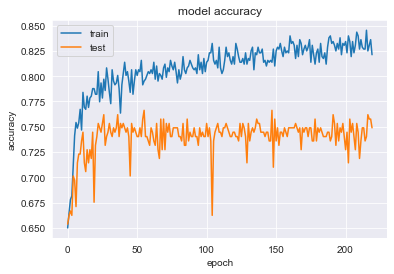

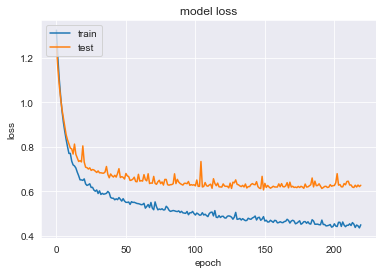

In [68]:
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.003)))
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.003)))
model.add(Dense(16, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.003)))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.003)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=220, batch_size=12, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()